In [34]:
import pandas as pd
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
import altair as alt
import sys
sys.path.append("../src/features/")
from graph_embed import GraphEmbed
sys.path.append("../src/models/")
from cluster_graphs import ClusterGraphs
sys.path.append("../src/visualization/")
from visualize import Visualize

In [35]:
clusters = pd.read_pickle("../models/graphs_clustered.pkl")
graphs = GraphEmbed().read_graphs(clusters)
viz = Visualize(clusters, graphs)
X = np.array(clusters.graph_embedding.to_list())

FileNotFoundError: [Errno 2] No such file or directory: '../models/graphs_clustered.pkl'

In [ ]:
topology_stats = ["num_nodes", "num_edges", "num_strongly_connected", "num_weakly_connected", "average_clustering_coef"]

In [ ]:
clust1 = clusters.loc[clusters.label == 1]
clust2 = clusters.loc[clusters.label == 2]
clust0 = clusters.loc[clusters.label == 0]

## Cluster Analysis

Chose 3 clusters based on the elbow plot

In [ ]:
cl = ClusterGraphs(clusters)
num_clusters, inertias = cl.choose_clust_num_k_means()

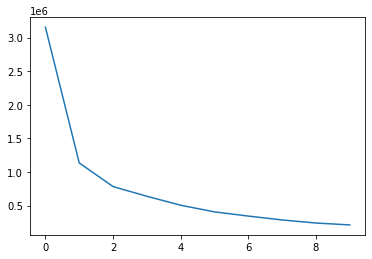

In [ ]:
plt.plot(inertias)

## Data Summary

In [ ]:
# 760 total graphs
len(clusters)

760

In [ ]:
clusters.label.value_counts()

1    475
2    193
0     92
Name: label, dtype: int64

In [ ]:
clusters.domain.nunique()

58

In [ ]:
clusters.domain.value_counts()

trendingpolitics.com          63
swarajyamag.com               42
zerohedge.com                 36
gnews.org                     35
washingtontimes.com           34
childrenshealthdefense.org    32
wattsupwiththat.com           28
prageru.com                   28
frontpagemag.com              25
rt.com                        25
toddstarnes.com               25
thelibertydaily.com           23
quillette.com                 22
peta.org                      22
everytown.org                 21
churchmilitant.com            21
infowars.com                  21
blacklistednews.com           20
townhall.com                  18
cnsnews.com                   18
democrats.org                 15
thehighwire.com               14
projectveritas.com            14
bigleaguepolitics.com         13
greenpeace.org                13
globaltimes.cn                11
indiatimes.com                10
gulfnews.com                  10
mindbodygreen.com              9
americanthinker.com            9
breitbart.

In [ ]:
clusters.num_nodes.describe()

count    760.000000
mean      36.056579
std       77.881337
min        4.000000
25%        8.750000
50%       13.000000
75%       29.000000
max      976.000000
Name: num_nodes, dtype: float64

In [ ]:
clusters.num_edges.describe()

count     760.000000
mean       35.807895
std        94.922255
min         3.000000
25%         7.000000
50%        11.500000
75%        26.000000
max      1328.000000
Name: num_edges, dtype: float64

In [ ]:
clusters.num_strongly_connected.describe()

count    760.000000
mean      35.905263
std       77.555498
min        3.000000
25%        8.000000
50%       13.000000
75%       29.000000
max      967.000000
Name: num_strongly_connected, dtype: float64

In [ ]:
clusters.num_weakly_connected.describe()

count    760.000000
mean       3.064474
std        5.348690
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       95.000000
Name: num_weakly_connected, dtype: float64

## Visualizing graphs in each cluster

In [ ]:
mean_ids = clusters.loc[clusters.is_mean_vec == True].id.to_list()
SAMPLE_NUM = 6

### Cluster 1

In [ ]:
clust1_ids = clust1.sample(SAMPLE_NUM).id.to_list()

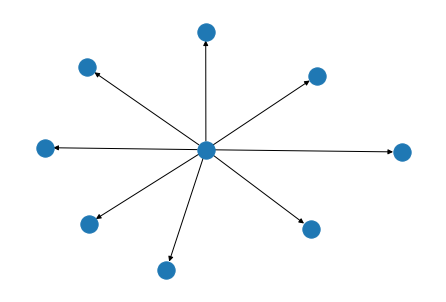

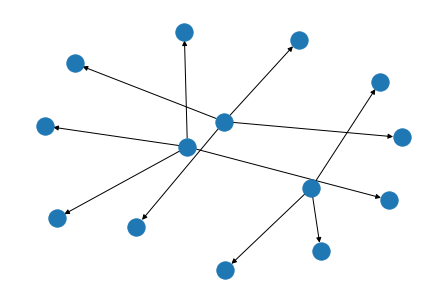

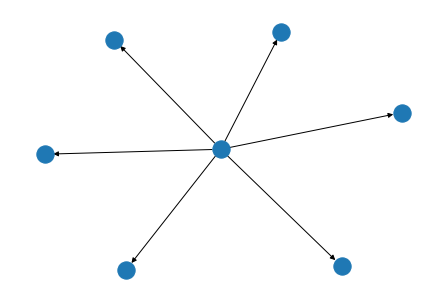

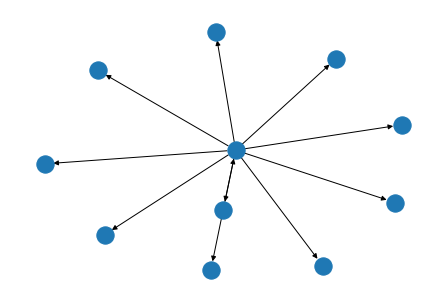

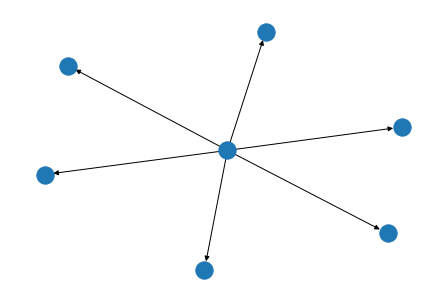

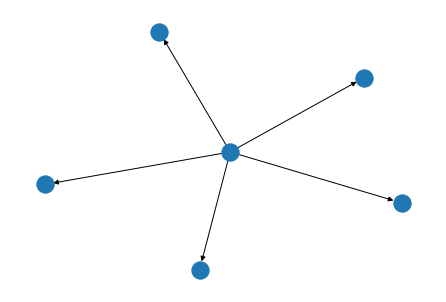

In [ ]:
viz.viz_graphs(clust1_ids)

#### Mean Graph

In [ ]:
clusters.loc[clusters.id == mean_ids[0]].domain

536    thenationalpulse.com
Name: domain, dtype: object

In [ ]:
clusters.loc[clusters.id == mean_ids[0]].title.values[0]

'INVESTIGATION: U.S. Has Funded Over 250 Studies for Chinese Communist Military Researchers.'

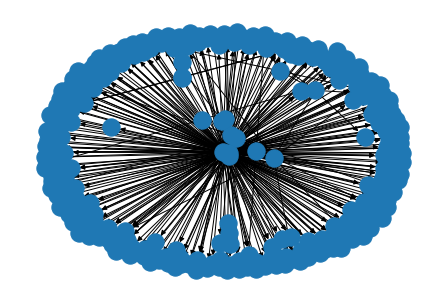

In [ ]:
nx.draw(graphs[mean_ids[0]])

### Cluster 2

In [ ]:
clust2_ids = clust2.sample(SAMPLE_NUM).id.to_list()

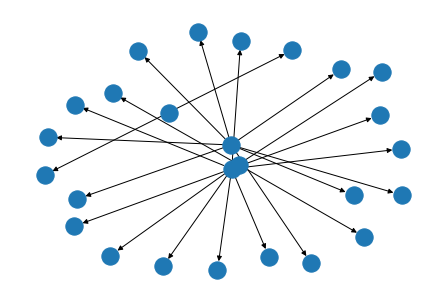

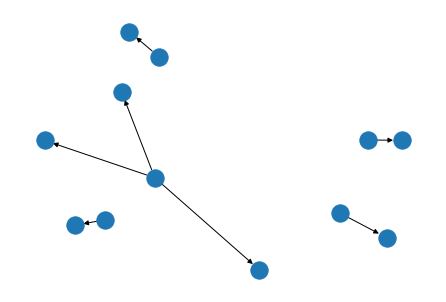

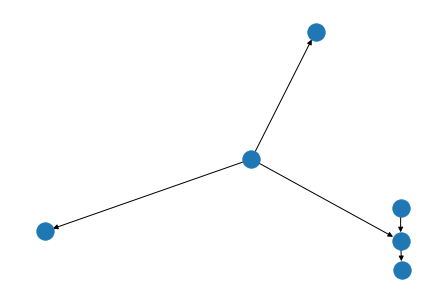

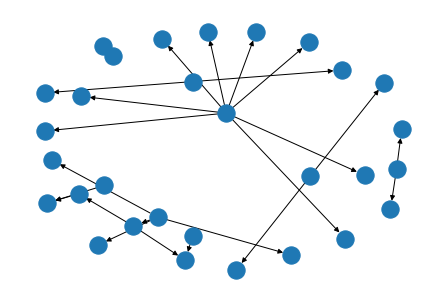

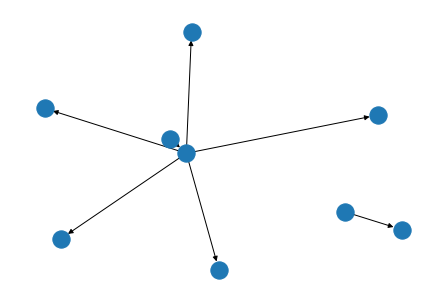

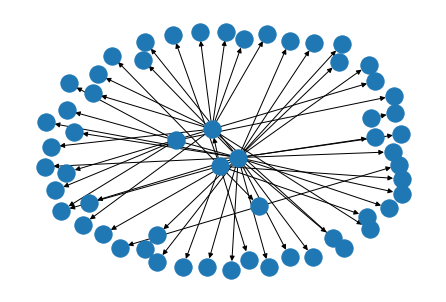

In [ ]:
viz.viz_graphs(clust2_ids)

#### Mean Graph

In [ ]:
clusters.loc[clusters.id == mean_ids[1]].domain

580    townhall.com
Name: domain, dtype: object

In [ ]:
clusters.loc[clusters.id == mean_ids[1]].title.values[0]

'Jimmy Carter II'

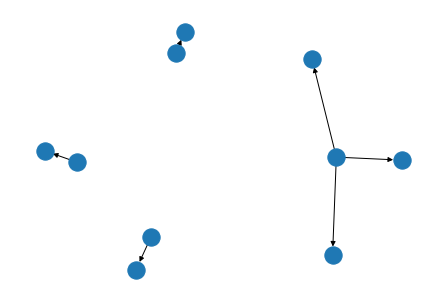

In [ ]:
nx.draw(graphs[mean_ids[1]])

#### Cluster 0

In [ ]:
clust0_ids = clust0.sample(SAMPLE_NUM).id.to_list()

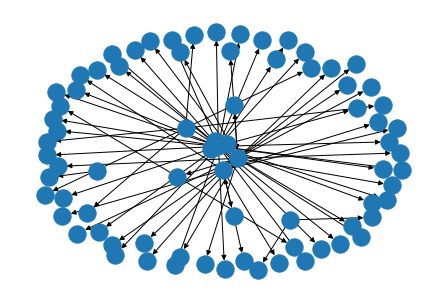

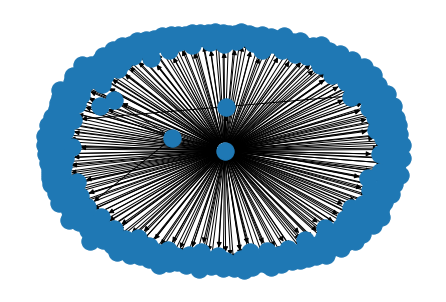

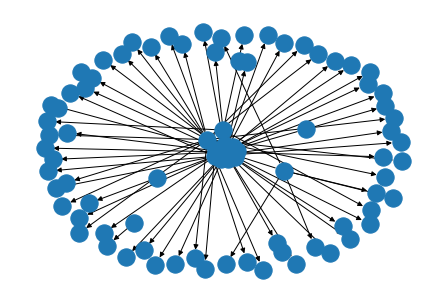

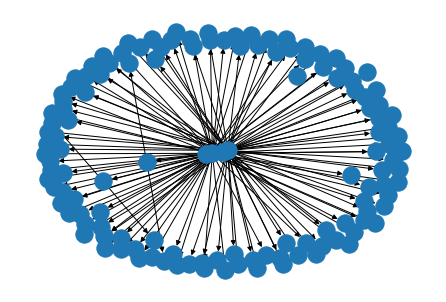

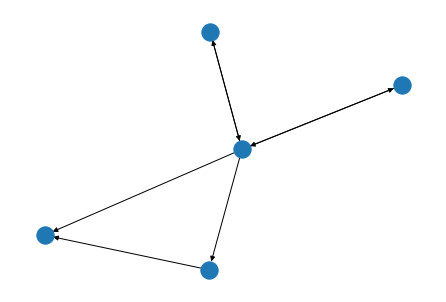

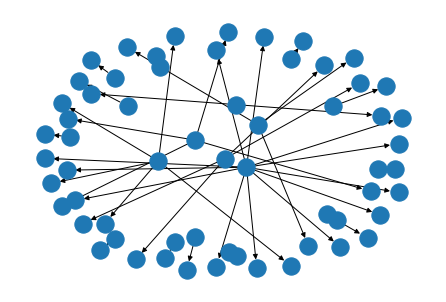

In [ ]:
viz.viz_graphs(clust0_ids)

#### Mean Graph

In [ ]:
clusters.loc[clusters.id == mean_ids[2]].domain

744    zerohedge.com
Name: domain, dtype: object

In [ ]:
clusters.loc[clusters.id == mean_ids[2]].title.values[0]

'Facebook "Getting Involved" In NFT Space As It Prepares To Roll Out Digital Wallet, Stablecoin'

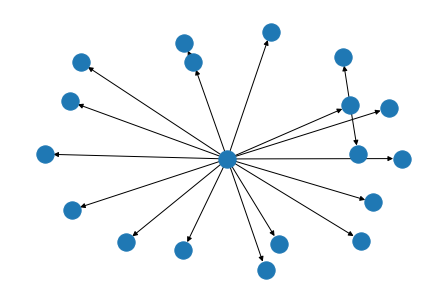

In [ ]:
nx.draw(graphs[mean_ids[2]])

## Exploring Differences in Clusters

In [ ]:
viz.graph_point_range_cluster_info(topology_stats[0:3], 300, 500, 3)

alt.FacetChart(...)

In [ ]:
viz.graph_point_range_cluster_info(topology_stats[-2:], 300, 500, 3)

alt.FacetChart(...)

In [ ]:
clust0.domain.unique()

array(['americanthinker.com', 'arabnews.com', 'bigleaguepolitics.com',
       'blacklistednews.com', 'childrenshealthdefense.org', 'cnsnews.com',
       'democrats.org', 'frontpagemag.com', 'greenpeace.org',
       'infowars.com', 'liveaction.org', 'nationalfile.com', 'oann.com',
       'peta.org', 'prageru.com', 'projectveritas.com', 'quillette.com',
       'rt.com', 'swarajyamag.com', 'theepochtimes.com',
       'thehighwire.com', 'thelibertydaily.com', 'thenationalpulse.com',
       'toddstarnes.com', 'townhall.com', 'trendingpolitics.com',
       'washingtontimes.com', 'wattsupwiththat.com',
       'worldstarhiphop.com', 'zerohedge.com'], dtype=object)

In [ ]:
clust1.domain.unique()

array(['albawaba.com', 'americanthinker.com', 'arabnews.com',
       'bigleaguepolitics.com', 'blacklistednews.com', 'bossip.com',
       'breitbart.com', 'childrenshealthdefense.org', 'chinadaily.com.cn',
       'churchmilitant.com', 'cnsnews.com', 'dailystar.co.uk',
       'democrats.org', 'everytown.org', 'frontpagemag.com',
       'globaltimes.cn', 'gnews.org', 'greenpeace.org', 'gulfnews.com',
       'iflscience.com', 'indiatimes.com', 'infowars.com',
       'lewrockwell.com', 'liveaction.org', 'livestrong.com',
       'mindbodygreen.com', 'nation.com.pk', 'nationalfile.com',
       'newswars.com', 'oann.com', 'odishatv.in', 'peta.org',
       'prageru.com', 'projectveritas.com', 'quillette.com', 'rt.com',
       'stream.org', 'swarajyamag.com', 'tass.com', 'theepochtimes.com',
       'thefreethoughtproject.com', 'thehighwire.com',
       'thelibertydaily.com', 'thenationalpulse.com',
       'thepoliticalinsider.com', 'toddstarnes.com', 'toofab.com',
       'townhall.com', 'trendi

In [ ]:
clust2.domain.unique()

array(['albawaba.com', 'americanthinker.com', 'bigleaguepolitics.com',
       'blacklistednews.com', 'breitbart.com',
       'childrenshealthdefense.org', 'cnsnews.com', 'democrats.org',
       'everytown.org', 'frontpagemag.com', 'gellerreport.com',
       'globaltimes.cn', 'greenpeace.org', 'gulfnews.com',
       'indiatimes.com', 'infowars.com', 'lewrockwell.com',
       'mindbodygreen.com', 'nationalfile.com', 'pdmj.org', 'peta.org',
       'pjmedia.com', 'prageru.com', 'projectveritas.com',
       'quillette.com', 'rt.com', 'stream.org', 'swarajyamag.com',
       'tass.com', 'theepochtimes.com', 'thehighwire.com',
       'thelibertydaily.com', 'thenationalpulse.com', 'toddstarnes.com',
       'townhall.com', 'trendingpolitics.com', 'washingtontimes.com',
       'wattsupwiththat.com', 'whale.to', 'zerohedge.com'], dtype=object)

## Visualizing principal components

In [ ]:
tsne = TSNE(2)
two_d = tsne.fit_transform(X)
components = pd.DataFrame(two_d, columns=['dim1', 'dim2'])
components['cluster'] = clusters.label
components['id'] = clusters.id
components = components.reset_index()

In [ ]:
alt.Chart(components).mark_circle(size=60).encode(
    x='dim1',
    y='dim2',
    color='cluster:N',
    tooltip=['id']
).interactive()

alt.Chart(...)

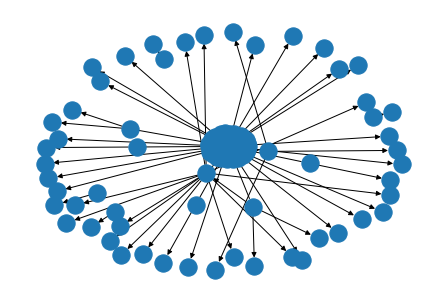

In [ ]:
nx.draw(graphs[2585723])

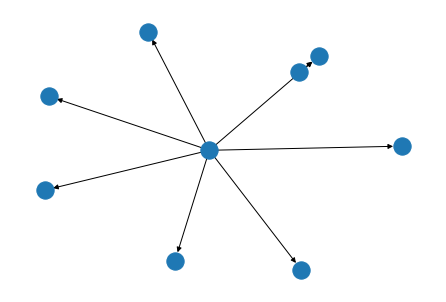

In [ ]:
nx.draw(graphs[2876751])

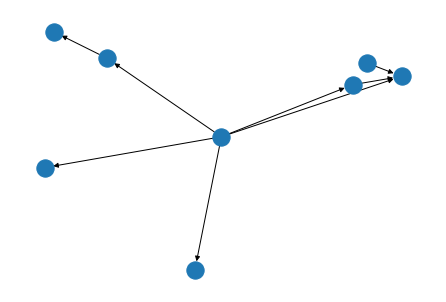

In [ ]:
nx.draw(graphs[2595950])